1773/1773 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step

📊 Classification Report:

              precision    recall  f1-score   support

   Corrected       0.87      0.74      0.80     19284
      Normal       0.53      0.88      0.66     19557
    Reversal       0.66      0.28      0.39     17882

    accuracy                           0.64     56723
   macro avg       0.69      0.63      0.62     56723
weighted avg       0.69      0.64      0.62     56723



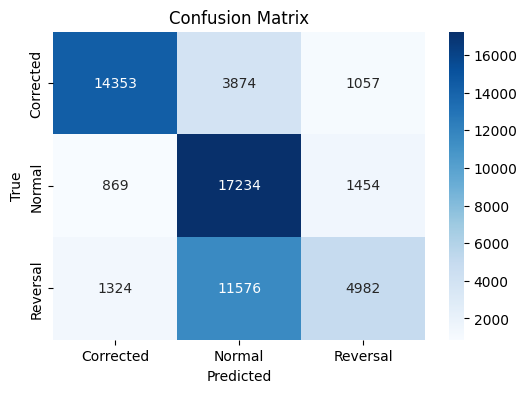

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

train_dir = "../dataset/Train"
test_dir  = "../dataset/Test"

print("Train dir:", os.path.abspath(train_dir))
print("Test dir :", os.path.abspath(test_dir))

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)

# ✅ Correct path (since notebook & model are in same folder)
model_path = "best_model_finetuned.keras"

print("Loading model:", model_path)
model = load_model(model_path)

# Evaluate
loss, acc = model.evaluate(test_generator, verbose=1)
print(f"\n✅ Test loss: {loss:.4f}   Test acc: {acc:.4f}")



Train dir: /home/madhavan_1502/project_ai/dataset/Train
Test dir : /home/madhavan_1502/project_ai/dataset/Test
Found 56723 images belonging to 3 classes.
Loading model: best_model_finetuned.keras


I0000 00:00:1760209656.760458   21536 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5338 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
/home/madhavan_1502/tfenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-10-11 19:07:43.236091: I external/local_xla/xla/service/service.cc:163] XLA service 0x74703c03aed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-11 19:07:43.236116: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-10-11

1770/1773 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7456 - loss: 0.6899

2025-10-11 19:08:32.229116: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-11 19:08:32.394024: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1773/1773 ━━━━━━━━━━━━━━━━━━━━ 52s 24ms/step - accuracy: 0.6447 - loss: 0.7593

✅ Test loss: 0.7593   Test acc: 0.6447
